# Segmentation

Ordre des choses à faire : 

- Séparer en lignes
- Séparer chaque ligne en mots 
- Séparer chaque mot en caractères 


https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html

## Séparer en lignes (RLSA)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import rlsa

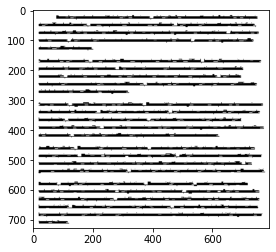

In [3]:
# Import de l'image et binarisation 

image = cv2.imread('image_texte_chatgpt.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
(thresh, image_binary) = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# function call
image_rlsa_horizontal = rlsa.rlsa(image_binary, True, False, 10)
#print(type(image_rlsa_horizontal))

plt.figure()
plt.imshow(image_rlsa_horizontal, cmap=plt.cm.gray)
plt.show()

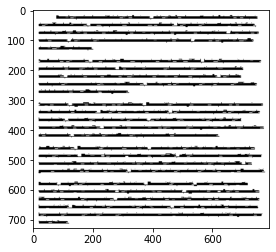

In [44]:
plt.figure()
plt.imshow(image_binary, cmap=plt.cm.gray)
plt.show()

In [4]:
print(image)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [5]:
print(gray)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [6]:
print(image_rlsa_horizontal)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


Pour l'image de base chaque case est est un RGB

In [11]:
print(len(image_binary))

728


In [16]:
def il_y_a_que_du_blanc(i_precedent, i) :
    """
    Prend en entrée deux indices de lignes de l'image binaire
    Renvoie True si il n'y a que des lignes considérées comme blanches entre ces 2 indices, False sinon

    """
    return [1 for elt in range(i_precedent, i) if sum(image_binary[elt])/len(image_binary[elt]) >= 0.95] == [1]*len(range(i_precedent,i))

In [27]:
# Blanc : 255
# Noir : 0

# Test de séparation des lignes sur l'image en binary : 

# Idée : dès qu'on repère une ligne avec plus de 95% de blanc (255) on prend l'indicce, on prendra ensuite l'indice de ligne de la ligne avec plus de 95% de blanc suivante, ce qui nous donne une ligne 

taux = 0
dico_des_lignes = {}

for i in range(len(image_binary)) : 
    ligne_pixel = image_binary[i]
    taux = sum(ligne_pixel)/len(ligne_pixel)
    dico_des_lignes[f"ligne_pixel_{i}"] = []
    i_precedent = i
    if taux >= 0.95 : 
        if il_y_a_que_du_blanc(i_precedent, i) == False :
            dico_des_lignes[f"ligne_pixel_{i_precedent}"].append(i)

# Vider le dictionnaire de toutes les entrées vides 
dico_des_lignes_pas_vides = {}

for elt in dico_des_lignes.keys() :
    if dico_des_lignes[elt] != [] :
        dico_des_lignes_pas_vides[elt] = dico_des_lignes[elt]

print(dico_des_lignes_pas_vides)

# Test d'affichage
for elt in dico_des_lignes_pas_vides.keys() :
    print(elt, dico_des_lignes_pas_vides[elt])



# NE MARCHE PAS, PAS LA BONNE IDEE A IMPLEMENTER

{}


In [35]:
print(image_binary[189])

somme = 0
for j in image_binary[189] :
    if j == 255 : 
        somme += 1
    else : 
        somme += 0
taux = somme/len(image_binary[146])
print(taux)

[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255   0   0 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255   0   0 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255   0   0 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255   0   0 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255   0 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255   0   0 255 25

In [42]:
liste_indices_pixels_blancs = []
liste_indices_pixels_noirs = []

for i in range(len(image_binary)) :
    ligne_pixel = image_binary[i]
    somme = 0
    for j in image_binary[i] :
        if j == 255 : 
            somme += 1
        else : 
            somme += 0
    taux_de_blancs = somme/len(image_binary[i])
    if taux_de_blancs >= 0.98 : #Quasi que des blancs
        liste_indices_pixels_blancs.append(i)
    else : 
        liste_indices_pixels_noirs.append(i)

print(liste_indices_pixels_blancs)
print(liste_indices_pixels_noirs)


# Séparer les listes
indices_lignes = []
for i in range(1, len(liste_indices_pixels_blancs)) :
    if liste_indices_pixels_blancs[i] != liste_indices_pixels_blancs[i-1]+1 :
        indices_lignes.append((liste_indices_pixels_blancs[i-1], liste_indices_pixels_blancs[i]))
print(indices_lignes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 371, 372, 373, 374,

In [47]:
print(len(indices_lignes))

25


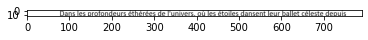

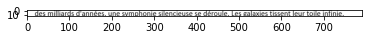

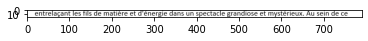

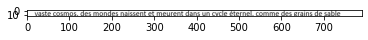

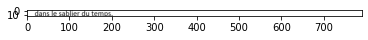

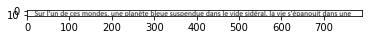

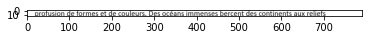

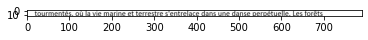

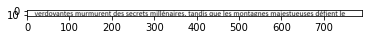

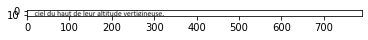

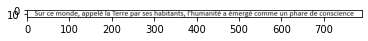

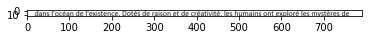

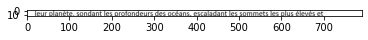

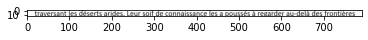

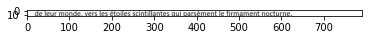

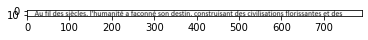

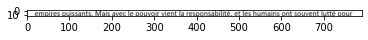

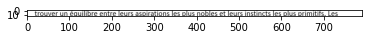

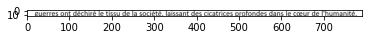

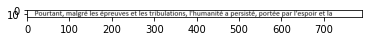

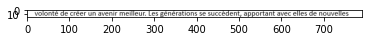

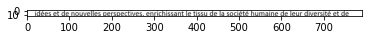

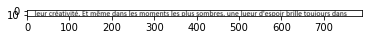

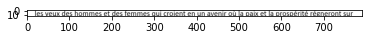

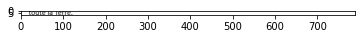

In [48]:
for t in indices_lignes :   
    plt.figure()
    plt.imshow(image[t[0]:t[1]])
    plt.show()

## Séparer les caractères

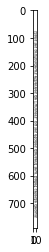

In [53]:
# Rotate une image

t = indices_lignes[0]

new = image[t[0]:t[1]]

new = cv2.transpose(new)

plt.figure()
plt.imshow(new)
plt.show()

# J'ai l'impression qu'on perd de la netteté
# Je vais partir différement

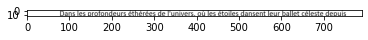

In [56]:
t = indices_lignes[0]

new = image[t[0]:t[1]]

plt.figure()
plt.imshow(new)
plt.show()

In [ ]:
# Parcourir dans le sens de la heuteur 
# Réussir à séparer les différents mots d'une ligne 